### Use a anaconda2 environment
* Install https://anaconda.org/menpo/opencv
* Install https://github.com/mxcube/lucid2

In [1]:
%matplotlib inline

In [2]:
import random
import os
import lucid2
import matplotlib.pyplot as plt
import imageio as iio
import cv2

In [3]:
FRAMES_DIR = '/mnt/maxiv/common/ML-crystals/lyzo1_frames/'

In [4]:
def get_images(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

def get_samples(l, k):
    return sorted(random.sample(l, k), key=lambda f: f[-7:-4])

In [5]:
images = get_images(FRAMES_DIR)
samples = get_samples(images, 10)
samples

['/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-011.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-013.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-014.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-033.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-096.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-102.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-146.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-151.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-155.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-158.png']

In [6]:
coords = [(s, lucid2.find_loop(s)) for s in samples]

In [7]:
"coords_found = filter(lambda tup: tup[1][0] == 'Coord', coords)
images = [(tup[0], iio.imread(tup[0]), tup[1]) for tup in coords_found]
len(images)

10

In [8]:
COLS = 3


def plot_all(images):
    i = 1
    fig = plt.figure(figsize=(40, 30))
    for name, img, coord in images:
        ax = fig.add_subplot((len(images) // COLS) + 1, COLS, i)
        ax.imshow(img)
        ax.scatter(coord[1], coord[2], s=50, c='red', marker='o')
        ax.set_title(os.path.basename(name), {'fontsize': 26})
        i += 1

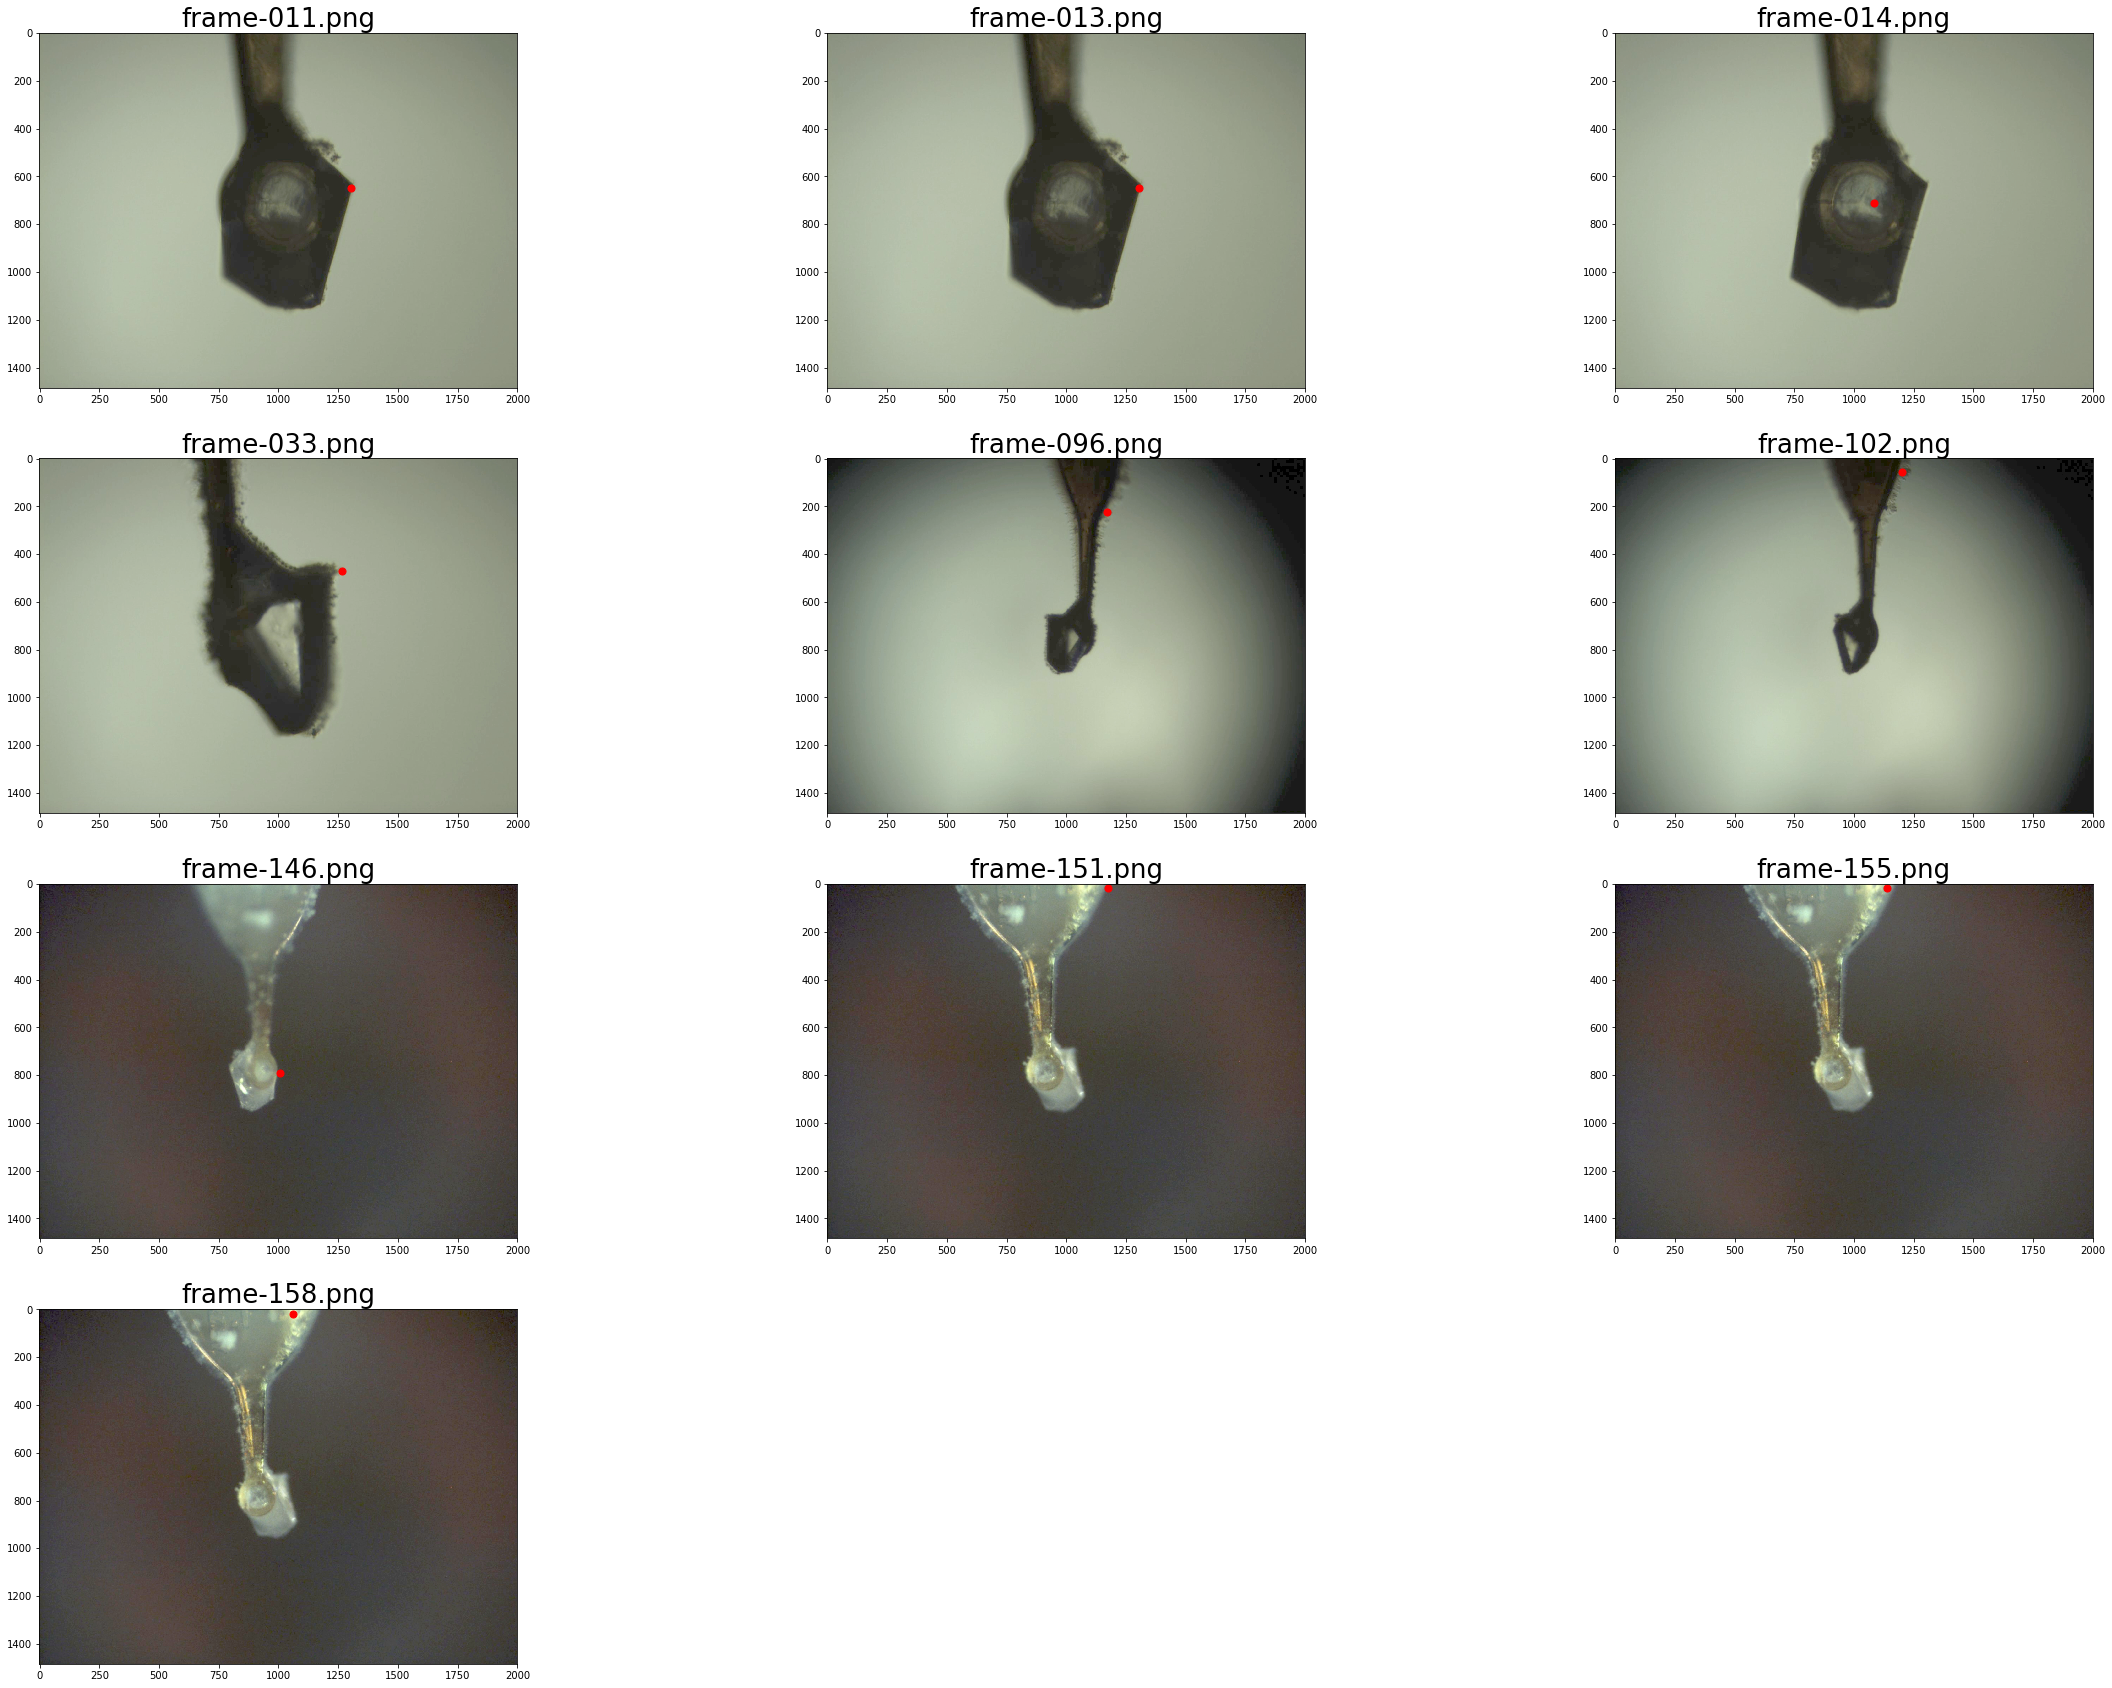

In [9]:
plot_all(images)